Authors :- AI21BTECH11003 and ES21BTECH11025

THE DATA DESCRIPTION:- Sales based on TV marketing budget

In [1]:
df = read.csv('tvmarketing.csv')
head(df)
tail(df)
print("dimensions of the dataset")
print(dim(df))

,TV,Sales
,<dbl>,<dbl>
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9
6,8.7,7.2


,TV,Sales
,<dbl>,<dbl>
195,149.7,17.3
196,38.2,7.6
197,94.2,9.7
198,177.0,12.8
199,283.6,25.5
200,232.1,13.4


[1] "dimensions of the dataset"
[1] 200   2


Linearity

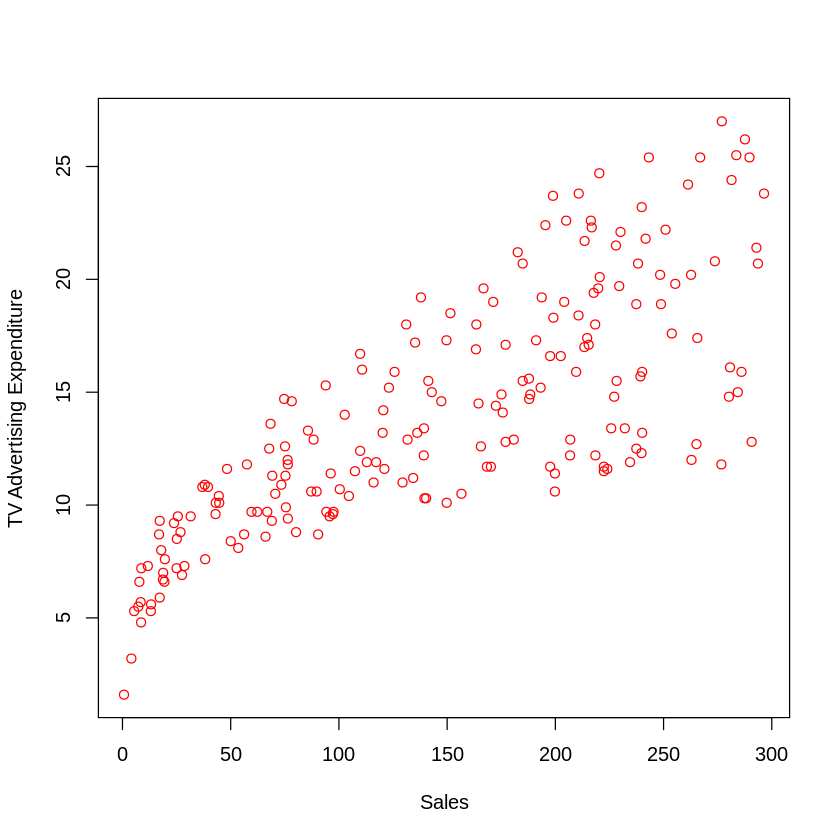

In [2]:

plot(df$TV,df$Sales, col = 'red',xlab = 'Sales',ylab= 'TV Advertising Expenditure')

In [12]:
print("pearson")
correlation_matrix <- cor(df,method = "pearson")

# Print the correlation matrix
print(correlation_matrix)

print("spearman")
correlation_matrix <- cor(df,method = "spearman")

# Print the correlation matrix
print(correlation_matrix)

[1] "pearson"
            TV    Sales
TV    1.000000 0.794562
Sales 0.794562 1.000000
[1] "spearman"
             TV     Sales
TV    1.0000000 0.8006144
Sales 0.8006144 1.0000000


Normality tests

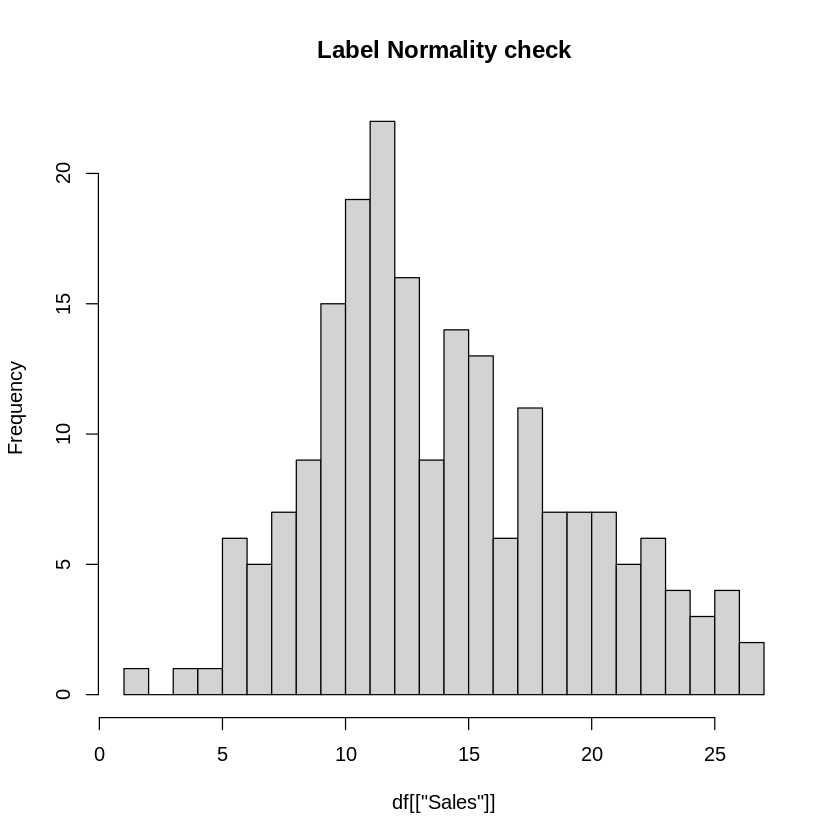

In [4]:
#Normality symptom
hist(df[["Sales"]],breaks=20,main='Label Normality check')

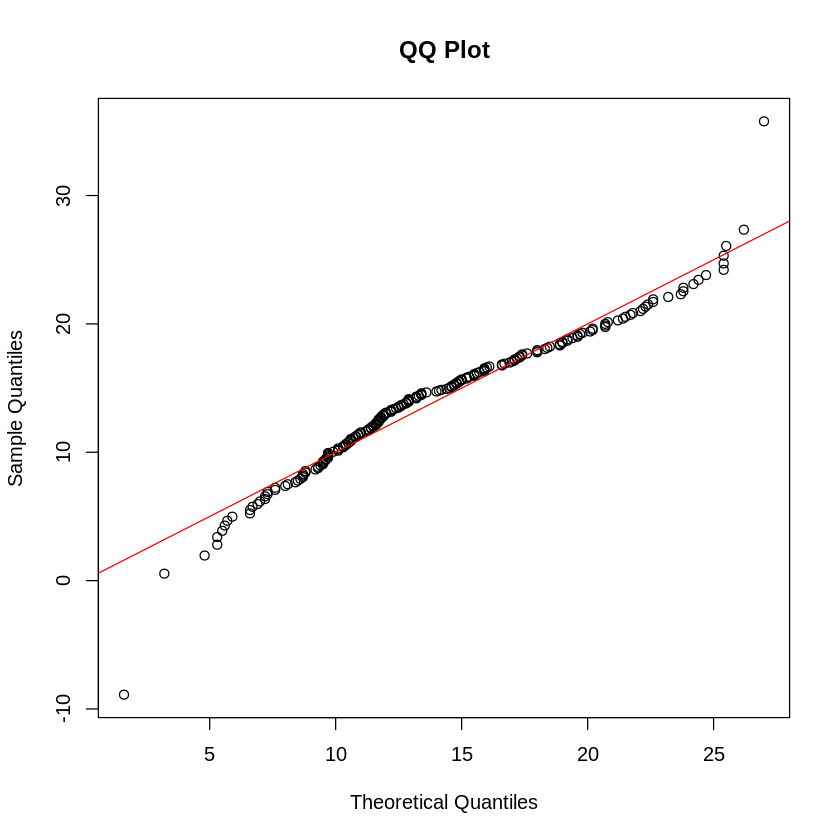

In [5]:

check<-df[["Sales"]]
n <- 100000
normal_dist <- rnorm(n, mean = mean(df$Sales), sd = sd(check))
qqplot(check, normal_dist, main = "QQ Plot", xlab = "Theoretical Quantiles", ylab = "Sample Quantiles")
abline(a = 0, b = 1, col = "red")


Hypothesis Testing

In [6]:
shapiro.test(df$Sales)


	Shapiro-Wilk normality test

data:  df$Sales
W = 0.97603, p-value = 0.001683


In [7]:
install.packages("nortest")
library(nortest)
ad.test(df$Sales)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Anderson-Darling normality test

data:  df$Sales
A = 1.7373, p-value = 0.0001831


[1] 0.5858586

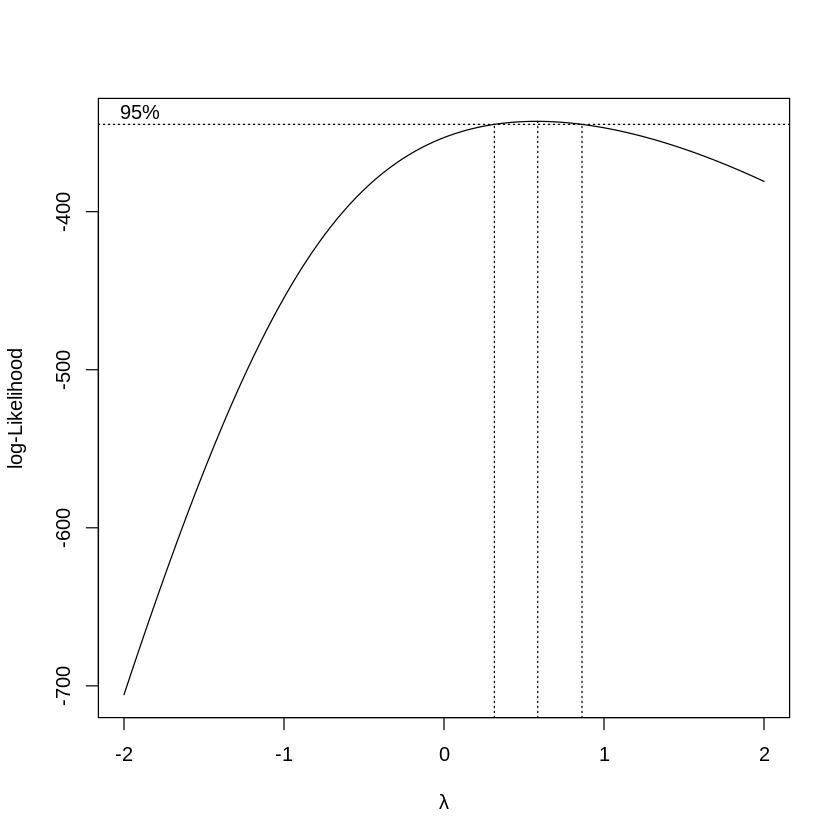

In [8]:
library(MASS)
y= df$Sales

t = boxcox(y~1)
ind = which.max(t$y)
t$x[ind]
df $Sales = df$Sales ^(0.585858585858586)

In [9]:
shapiro.test(df$Sales)
ad.test(df$Sales)


	Shapiro-Wilk normality test

data:  df$Sales
W = 0.9892, p-value = 0.1362



	Anderson-Darling normality test

data:  df$Sales
A = 0.6604, p-value = 0.08352


Mean Regression -
explain equations , why mean regression

yi = a + b * xi + ei


reasoning of mean is bec of large data

In [10]:
Y = df$Sales
Y = Y - mean(Y)


Call:
lm(formula = Y ~ TV, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89627 -0.37579  0.00599  0.45446  1.27556 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.4094421  0.0885788  -15.91   <2e-16 ***
TV           0.0095853  0.0005206   18.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6305 on 198 degrees of freedom
Multiple R-squared:  0.6313,	Adjusted R-squared:  0.6295 
F-statistic: 339.1 on 1 and 198 DF,  p-value: < 2.2e-16


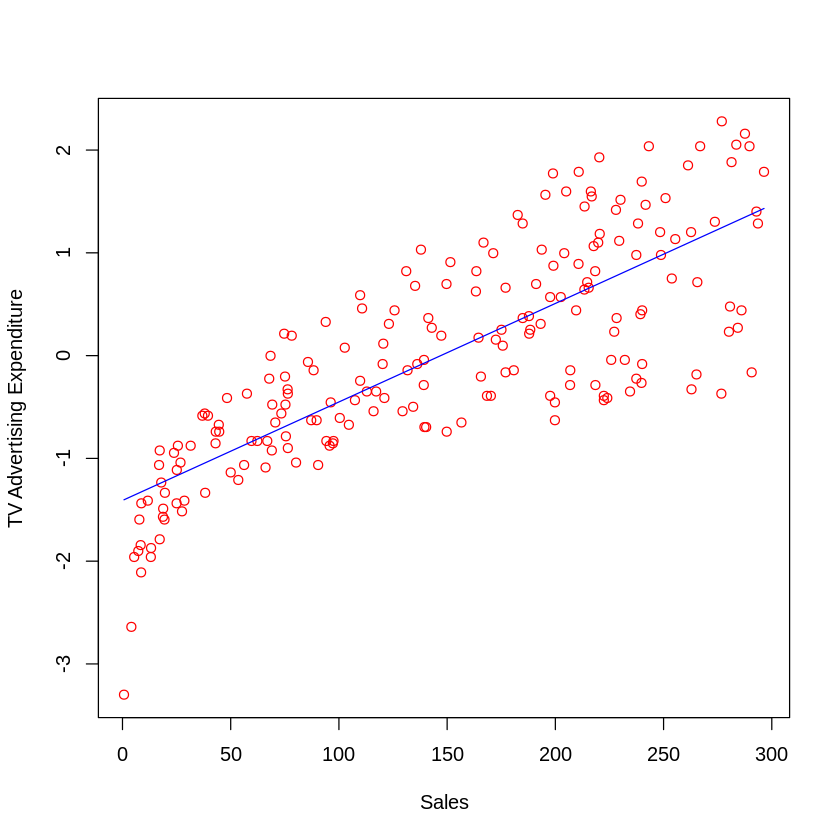

In [11]:
fit = lm(Y~TV,data =df)
summary(fit)

plot(df$TV,Y, col = 'red',xlab = 'Sales',ylab= 'TV Advertising Expenditure')
lines(df$TV,predict(fit), col = "blue")